In [87]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
data = pd.read_csv('train_preprocessed.csv')
data.head()


,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,voted
0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,...,1,0,1,1,0,1,0,1,1,2
1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,...,1,0,1,1,0,1,0,1,1,2
2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,...,1,0,1,1,1,1,0,1,1,1
3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,...,0,0,0,1,0,1,0,1,1,1
4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,...,1,1,1,1,0,1,1,1,1,1


In [88]:
Qtime = data.iloc[:,1::2].iloc[:,:20]
Qtimes = pd.DataFrame(np.where(Qtime>Qtime.median(),1,0),index = Qtime.index,columns = Qtime.columns)
data['QaE	QbE	QcE	QdE	QeE	QfE	QgE	QhE	QiE	QjE	QkE	QlE	QmE	QnE	QoE	QpE	QqE	QrE	QsE	QtE'.split('\t')] = Qtimes
data.head()

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,voted
0,3.0,0,4.0,1,5.0,1,1.0,1,2.0,1,...,1,0,1,1,0,1,0,1,1,2
1,5.0,1,5.0,1,3.0,1,5.0,1,1.0,1,...,1,0,1,1,0,1,0,1,1,2
2,4.0,1,1.0,1,1.0,1,4.0,1,5.0,1,...,1,0,1,1,1,1,0,1,1,1
3,3.0,0,3.0,1,4.0,1,3.0,1,1.0,0,...,0,0,0,1,0,1,0,1,1,1
4,1.0,1,1.0,0,5.0,0,2.0,1,1.0,0,...,1,1,1,1,0,1,1,1,1,1


In [89]:
Qaswer = data.iloc[:,::2].iloc[:,:20]
Qaswer[["QeA", "QfA", "QkA", "QqA", "QrA", "QaA", "QdA", "QgA", "QiA", "QnA"]] = 6 - Qaswer[["QeA", "QfA", "QkA", "QqA", "QrA", "QaA", "QdA", "QgA", "QiA", "QnA"]]
data['MachScore']=Qaswer.mean(axis = 1)
data.head()

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,voted,MachScore
0,3.0,0,4.0,1,5.0,1,1.0,1,2.0,1,...,0,1,1,0,1,0,1,1,2,2.95
1,5.0,1,5.0,1,3.0,1,5.0,1,1.0,1,...,0,1,1,0,1,0,1,1,2,2.60
2,4.0,1,1.0,1,1.0,1,4.0,1,5.0,1,...,0,1,1,1,1,0,1,1,1,1.90
3,3.0,0,3.0,1,4.0,1,3.0,1,1.0,0,...,0,0,1,0,1,0,1,1,1,3.35
4,1.0,1,1.0,0,5.0,0,2.0,1,1.0,0,...,1,1,1,0,1,1,1,1,1,3.00


In [90]:
data['Qtsum'] = data.iloc[:,1::2].iloc[:,:20].sum(axis = 1)
data.head()

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,voted,MachScore,Qtsum
0,3.0,0,4.0,1,5.0,1,1.0,1,2.0,1,...,1,1,0,1,0,1,1,2,2.95,7
1,5.0,1,5.0,1,3.0,1,5.0,1,1.0,1,...,1,1,0,1,0,1,1,2,2.60,20
2,4.0,1,1.0,1,1.0,1,4.0,1,5.0,1,...,1,1,1,1,0,1,1,1,1.90,17
3,3.0,0,3.0,1,4.0,1,3.0,1,1.0,0,...,0,1,0,1,0,1,1,1,3.35,16
4,1.0,1,1.0,0,5.0,0,2.0,1,1.0,0,...,1,1,0,1,1,1,1,1,3.00,7


In [91]:
# 클러스터링이 너어어어어어어무 안되서 역전 후 평균값을 계산하기 전에 7 값을 대체해보았다.
# 먼저 대응되는 두 컬럼 중 하나의 컬럼에 0이 있으면 대응되는 컬럼의 값을 가져온다. 
# 둘 다 값이 7이면 0 ~ 6 값 중 중간값이 3를 채운다.

data[['tp02','tp04','tp06','tp08','tp10']]= data[['tp02','tp04','tp06','tp08','tp10']].apply(lambda x: x.map({0:4,1:5,2:6,3:3,4:0,5:1,6:2,7:7}))

for i in [('tp01','tp06'),('tp02','tp07'),('tp03','tp08'),('tp04','tp09'),('tp05','tp10')]: #0 1 2 3 4 5 6 7
    data[i[0]] = np.where(data[i[0]] == 7,np.where(data[i[1]] ==7,3,data[i[1]]),data[i[0]])
    data[i[1]] = np.where(data[i[1]] == 7,np.where(data[i[0]] ==7,3,data[i[0]]),data[i[1]])
    
data['Extraversion']= (data.tp01+data.tp06)/2
data['Agreeableness']=(data.tp02+data.tp07)/2
data['Conscientiousness']= (data.tp03+data.tp08)/2
data['Emotional Stability']= (data.tp04+data.tp09)/2
data['Openness to Experiences']= (data.tp05+data.tp10)/2
data.head()

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,wr_12,wr_13,voted,MachScore,Qtsum,Extraversion,Agreeableness,Conscientiousness,Emotional Stability,Openness to Experiences
0,3.0,0,4.0,1,5.0,1,1.0,1,2.0,1,...,1,1,2,2.95,7,3.5,6.0,1.0,4.5,2.5
1,5.0,1,5.0,1,3.0,1,5.0,1,1.0,1,...,1,1,2,2.60,20,3.5,4.0,0.0,2.0,0.5
2,4.0,1,1.0,1,1.0,1,4.0,1,5.0,1,...,1,1,1,1.90,17,1.0,2.5,1.5,1.0,3.0
3,3.0,0,3.0,1,4.0,1,3.0,1,1.0,0,...,1,1,1,3.35,16,2.5,0.5,2.0,3.0,2.0
4,1.0,1,1.0,0,5.0,0,2.0,1,1.0,0,...,1,1,1,3.00,7,3.5,2.5,1.5,2.0,1.0


In [92]:
tipi_threshold_table = {
    'Male':{
        '10s':[(3.79,1.55),(4.47,1.22),(4.41,1.39),(4.61,1.47),(5.43,1.17)],
        '20s':[(3.73,1.54),(4.5,1.2),(4.57,1.39),(4.64,1.46),(5.49,1.13)],
        '30s':[(3.81,1.55),(4.55,1.21),(4.77,1.35),(4.63,1.42),(5.49,1.12)],
        '40s':[(3.85,1.54),(4.7,1.18),(4.96,1.35),(4.72,1.39),(5.41,1.17)],
        '50s':[(3.87,1.54),(4.89,1.18),(5.11,1.31),(4.8,1.38),(5.39,1.2)],
        '60s':[(3.85,1.49),(4.95,1.17),(5.26,1.3),(4.92,1.34),(5.37,1.26)],
        '+70s':[(3.85,1.49),(4.95,1.17),(5.26,1.3),(4.92,1.34),(5.37,1.26)]
    },
    'Female':{
        '10s':[(4.06,1.58),(4.73,1.22),(4.52,1.42),(4.07,1.46),(5.58,1.1)],
        '20s':[(4.07,1.61),(4.88,1.19),(4.78,1.41),(4.09,1.45),(5.55,1.12)],
        '30s':[(4.17,1.64),(5.04,1.19),(4.97,1.41),(4.25,1.45),(5.49,1.18)],
        '40s':[(4.2,1.64),(5.28,1.17),(5.18,1.36),(4.49,1.45),(5.46,1.2)],
        '50s':[(4.18,1.6),(5.43,1.14),(5.35,1.31),(4.66,1.44),(5.42,1.25)],
        '60s':[(4.21,1.62),(5.5,1.15),(5.39,1.36),(4.84,1.4),(5.39,1.27)],
        '+70s':[(4.21,1.62),(5.5,1.15),(5.39,1.36),(4.84,1.4),(5.39,1.27)]
    }
}

big_five_personality = ['Extraversion','Agreeableness','Conscientiousness','Emotional Stability','Openness to Experiences']

def binarize_big_5_personality(row):
    for idx,col in enumerate(big_five_personality):
        mean = 7 - tipi_threshold_table[row.gender][row.age_group][idx][0]
        std = tipi_threshold_table[row.gender][row.age_group][idx][1]
        if row[col] > mean + std:
            row[col] = 4 # 강한 부정
        elif row[col] > mean:
            row[col] = 3 # 부정
        elif row[col] > mean - std:
            row[col] = 2 # 긍정
        else:
            row[col] = 1 # 강한 긍정 
        
    return row
data = data.apply(binarize_big_5_personality,axis=1)

In [93]:
data.head()

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,wr_12,wr_13,voted,MachScore,Qtsum,Extraversion,Agreeableness,Conscientiousness,Emotional Stability,Openness to Experiences
0,3.0,0,4.0,1,5.0,1,1.0,1,2.0,1,...,1,1,2,2.95,7,3,4,2,4,3
1,5.0,1,5.0,1,3.0,1,5.0,1,1.0,1,...,1,1,2,2.60,20,3,4,1,2,2
2,4.0,1,1.0,1,1.0,1,4.0,1,5.0,1,...,1,1,1,1.90,17,1,3,2,2,4
3,3.0,0,3.0,1,4.0,1,3.0,1,1.0,0,...,1,1,1,3.35,16,2,1,2,3,3
4,1.0,1,1.0,0,5.0,0,2.0,1,1.0,0,...,1,1,1,3.00,7,3,2,2,2,2


In [94]:
data.iloc[:,-8:].isnull().sum()

voted                      0
MachScore                  0
Qtsum                      0
Extraversion               0
Agreeableness              0
Conscientiousness          0
Emotional Stability        0
Openness to Experiences    0
dtype: int64

In [95]:
data.columns

Index(['QaA', 'QaE', 'QbA', 'QbE', 'QcA', 'QcE', 'QdA', 'QdE', 'QeA', 'QeE',
       'QfA', 'QfE', 'QgA', 'QgE', 'QhA', 'QhE', 'QiA', 'QiE', 'QjA', 'QjE',
       'QkA', 'QkE', 'QlA', 'QlE', 'QmA', 'QmE', 'QnA', 'QnE', 'QoA', 'QoE',
       'QpA', 'QpE', 'QqA', 'QqE', 'QrA', 'QrE', 'QsA', 'QsE', 'QtA', 'QtE',
       'age_group', 'education', 'engnat', 'familysize', 'gender', 'hand',
       'married', 'race', 'religion', 'tp01', 'tp02', 'tp03', 'tp04', 'tp05',
       'tp06', 'tp07', 'tp08', 'tp09', 'tp10', 'urban', 'wf_01', 'wf_02',
       'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05', 'wr_06', 'wr_07',
       'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13', 'voted',
       'MachScore', 'Qtsum', 'Extraversion', 'Agreeableness',
       'Conscientiousness', 'Emotional Stability', 'Openness to Experiences'],
      dtype='object')

In [96]:
data['age'] = data['age_group'].map({'10s':10, '20s':20, '30s':30, '40s':40, '50s':50, '60s':60, '+70s':70})

In [97]:
data['voted'] = data['voted'].map({1:1,2:0})

In [98]:
data['gender'] = data['gender'].map({'Male':1,'Female':0})

In [99]:
columnlist=['age','gender','MachScore','education','voted','married','Qtsum', 'Extraversion', 'Agreeableness',
'Conscientiousness','Emotional Stability', 'Openness to Experiences']

In [100]:
subdata = data[columnlist].copy()
subdata.head()

,age,gender,MachScore,education,voted,married,Qtsum,Extraversion,Agreeableness,Conscientiousness,Emotional Stability,Openness to Experiences
0,30,0,2.95,2,0,3,7,3,4,2,4,3
1,20,0,2.60,4,0,1,20,3,4,1,2,2
2,30,1,1.90,3,1,2,17,1,3,2,2,4
3,20,0,3.35,4,1,1,16,2,1,2,3,3
4,20,1,3.00,3,1,2,7,3,2,2,2,2


In [101]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
scaledata= mm.fit_transform(subdata)

In [102]:
scaledata = pd.DataFrame(scaledata,columns = columnlist)
scaledata.describe()

,age,gender,MachScore,education,voted,married,Qtsum,Extraversion,Agreeableness,Conscientiousness,Emotional Stability,Openness to Experiences
count,45529.000000,45529.000000,45529.000000,45529.000000,45529.000000,45529.000000,45529.000000,45529.000000,45529.000000,45529.000000,45529.000000,45529.000000
mean,0.233796,0.531837,0.588125,0.525336,0.453162,0.194865,0.499489,0.550052,0.633823,0.507757,0.568063,0.531251
std,0.228828,0.498991,0.198670,0.301783,0.497807,0.318610,0.269364,0.364962,0.353474,0.356559,0.346332,0.286903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.437500,0.333333,0.000000,0.000000,0.300000,0.333333,0.333333,0.333333,0.333333,0.333333
50%,0.166667,1.000000,0.587500,0.666667,0.000000,0.000000,0.500000,0.666667,0.666667,0.333333,0.666667,0.333333
75%,0.333333,1.000000,0.737500,0.666667,1.000000,0.500000,0.700000,1.000000,1.000000,1.000000,1.000000,0.666667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


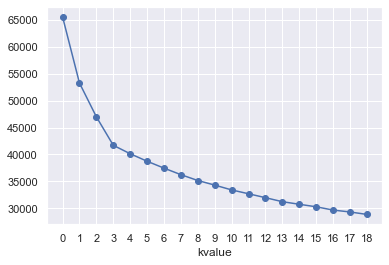

In [103]:
from sklearn.cluster import KMeans
dist =[]
for i in range(1,20):
    km = KMeans(n_clusters=i,init = 'k-means++',n_init=10,max_iter = 200)
    km.fit(scaledata)
    dist.append(km.inertia_)
plt.plot(range(len(dist)),dist,marker = 'o')
ticks = plt.xticks(range(len(dist)))
plt.xlabel('kvalue')
plt.show()

In [104]:
knn = KMeans(n_clusters =3)
knn.fit(scaledata)
y_km= knn.predict(scaledata)
data['k3'] = y_km

In [105]:
data.head()

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,voted,MachScore,Qtsum,Extraversion,Agreeableness,Conscientiousness,Emotional Stability,Openness to Experiences,age,k3
0,3.0,0,4.0,1,5.0,1,1.0,1,2.0,1,...,0,2.95,7,3,4,2,4,3,30,0
1,5.0,1,5.0,1,3.0,1,5.0,1,1.0,1,...,0,2.60,20,3,4,1,2,2,20,0
2,4.0,1,1.0,1,1.0,1,4.0,1,5.0,1,...,1,1.90,17,1,3,2,2,4,30,2
3,3.0,0,3.0,1,4.0,1,3.0,1,1.0,0,...,1,3.35,16,2,1,2,3,3,20,2
4,1.0,1,1.0,0,5.0,0,2.0,1,1.0,0,...,1,3.00,7,3,2,2,2,2,20,2


In [106]:
pd.DataFrame(mm.inverse_transform(knn.cluster_centers_),columns = columnlist)

,age,gender,MachScore,education,voted,married,Qtsum,Extraversion,Agreeableness,Conscientiousness,Emotional Stability,Openness to Experiences
0,20.225198,1.565414e-14,3.208369,2.310234,1.043610e-14,1.317712,9.525172,2.726806,2.916442,2.576646,2.826798,2.652900
1,19.361003,1.000000e+00,3.613620,2.288220,2.248202e-14,1.220066,9.775455,2.643774,2.956106,2.517990,2.700956,2.599657
2,29.177491,5.243311e-01,3.263302,2.911012,1.000000e+00,1.540035,10.387941,2.611574,2.857648,2.496946,2.637941,2.556950


In [107]:
# 12가지 feature로 클러스터링한 결과 
# 0번과 1번 2번을 비교했을 때 0번은
#  30대 낮은 마키아벨리스코어 높은 교육수준 
# Extraversion 긍정 / Extraversion 긍정 /Conscientiousness 긍정 / Openness to Experiences 긍정

- 성별 1 남성 0 여성
- 교육수준 1: 고등학교 미만 2:고등학교 졸업 3: 대학졸업 4: 대학원졸업
- 투표 : 1 : 투표함 0: 투표 안함
- 결혼 : 1=미혼, 2= 기혼, 3= 이혼 경험 유 , 0= 이외
- TIPI 범위 1 ~ 2 ~ 3 ~ 4 ( 매우 높음 높음 낮음 매우낮음 )

In [108]:
# k = 4 라면 
km = KMeans(n_clusters =4)
km.fit(scaledata)
ykm= km.predict(scaledata)
data['k4'] = ykm

In [109]:
data.head()

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,MachScore,Qtsum,Extraversion,Agreeableness,Conscientiousness,Emotional Stability,Openness to Experiences,age,k3,k4
0,3.0,0,4.0,1,5.0,1,1.0,1,2.0,1,...,2.95,7,3,4,2,4,3,30,0,0
1,5.0,1,5.0,1,3.0,1,5.0,1,1.0,1,...,2.60,20,3,4,1,2,2,20,0,0
2,4.0,1,1.0,1,1.0,1,4.0,1,5.0,1,...,1.90,17,1,3,2,2,4,30,2,1
3,3.0,0,3.0,1,4.0,1,3.0,1,1.0,0,...,3.35,16,2,1,2,3,3,20,2,2
4,1.0,1,1.0,0,5.0,0,2.0,1,1.0,0,...,3.00,7,3,2,2,2,2,20,2,1


In [110]:
pd.DataFrame(mm.inverse_transform(km.cluster_centers_),columns = columnlist)

,age,gender,MachScore,education,voted,married,Qtsum,Extraversion,Agreeableness,Conscientiousness,Emotional Stability,Openness to Experiences
0,20.225198,1.576517e-14,3.208369,2.310234,1.049161e-14,1.317712,9.525172,2.726806,2.916442,2.576646,2.826798,2.652900
1,27.883158,1.000000e+00,3.480047,2.874191,1.000000e+00,1.447125,10.618321,2.572749,2.896561,2.440007,2.606674,2.545850
2,30.604239,3.441691e-15,3.024384,2.951600,1.000000e+00,1.642450,10.133992,2.654371,2.814754,2.559711,2.672407,2.569187
3,19.361003,1.000000e+00,3.613620,2.288220,2.242651e-14,1.220066,9.775455,2.643774,2.956106,2.517990,2.700956,2.599657


In [111]:
# 투표를 한 경우 2번 클러스터와 2번 클러스터는 약 30대 높은 교육 수준 상대적으로 결혼률 높고 TIPI 가 상대적 긍정적
# TIPI 수치 : Extraversion : 2.64 이하	 Agreeableness : 2.89이하	Conscientiousness : 2.55이하( 투표 안한 경우와 구분 x )	Emotional Stability : 2.62이하	Openness to Experiences 2.56이하
# 투표를 안 한 경우 0번 클러스터와 3번 클러스터는 약 20대 낮은 교육 수준 상대적 결혼률 낮고 TIPI가 상대적 부정적

In [112]:
data.head()

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,MachScore,Qtsum,Extraversion,Agreeableness,Conscientiousness,Emotional Stability,Openness to Experiences,age,k3,k4
0,3.0,0,4.0,1,5.0,1,1.0,1,2.0,1,...,2.95,7,3,4,2,4,3,30,0,0
1,5.0,1,5.0,1,3.0,1,5.0,1,1.0,1,...,2.60,20,3,4,1,2,2,20,0,0
2,4.0,1,1.0,1,1.0,1,4.0,1,5.0,1,...,1.90,17,1,3,2,2,4,30,2,1
3,3.0,0,3.0,1,4.0,1,3.0,1,1.0,0,...,3.35,16,2,1,2,3,3,20,2,2
4,1.0,1,1.0,0,5.0,0,2.0,1,1.0,0,...,3.00,7,3,2,2,2,2,20,2,1


In [113]:
# k = 3 인 0번 클러스터를 기준으로 다시 kmeans 진행 
data2 = data[data['k3'] == 0][columnlist]
data2.head()

,age,gender,MachScore,education,voted,married,Qtsum,Extraversion,Agreeableness,Conscientiousness,Emotional Stability,Openness to Experiences
0,30,0,2.95,2,0,3,7,3,4,2,4,3
1,20,0,2.60,4,0,1,20,3,4,1,2,2
5,40,0,2.20,2,0,3,15,3,3,4,2,4
10,20,0,3.35,4,0,1,19,1,2,2,3,4
18,30,0,3.70,4,0,1,0,3,4,4,4,3


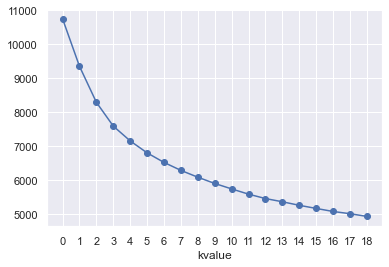

In [114]:
mm = MinMaxScaler()
scaledata2= mm.fit_transform(data2)
scaledata2 = pd.DataFrame(scaledata2,columns = columnlist)
dist2 =[]
for i in range(1,20):
    km2 = KMeans(n_clusters=i,init = 'k-means++',n_init=10,max_iter = 200)
    km2.fit(scaledata2)
    dist2.append(km2.inertia_)
plt.plot(range(len(dist)),dist2,marker = 'o')
ticks = plt.xticks(range(len(dist2)))
plt.xlabel('kvalue')
plt.show()

엘보 그래프에서 k 값이 1이므로 더 이상 나누면 의미 x 

# 투표를 한 경우 2번 클러스터와 2번 클러스터는 약 30대 높은 교육 수준(2.8이상) 상대적으로 결혼률(1.4이상) 높고 TIPI 가 상대적 긍정적
# TIPI 수치 : Extraversion : 2.64 이하
# Agreeableness : 2.89이하
# Conscientiousness : 2.55이하( 투표 안한 경우와 구분 안됨 )
# Emotional Stability : 2.62이하
# Openness to Experiences 2.56이하

In [117]:
columnlist2=['age','voted','education','MachScore', 'Extraversion', 'Agreeableness',
'Emotional Stability', 'Openness to Experiences']
vdata = data[columnlist2]

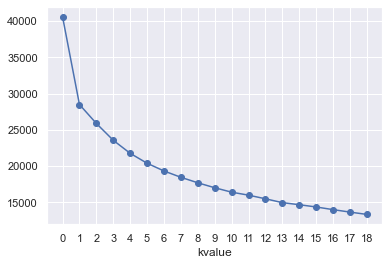

In [118]:
mm = MinMaxScaler()
scaledata2= mm.fit_transform(vdata)
scaledata2 = pd.DataFrame(scaledata2,columns = columnlist2)
dist2 =[]
for i in range(1,20):
    km2 = KMeans(n_clusters=i,init = 'k-means++',n_init=10,max_iter = 300)
    km2.fit(scaledata2)
    dist2.append(km2.inertia_)
plt.plot(range(len(dist)),dist2,marker = 'o')
ticks = plt.xticks(range(len(dist2)))
plt.xlabel('kvalue')
plt.show()

### 투표에 영향이 있는 피쳐를 클러스터링 하려고 했지만 분류 안됨 'age','voted','education','MachScore', 'Extraversion', 'Agreeableness', 'Emotional Stability', 'Openness to Experiences'
### 엘보그래프에서 k = 1

# 마키아벨리즘스코어와 TIPI와의 관계 

   MachScore  Agreeableness
0   3.605789       4.000000
1   3.048554       1.632925
2   3.391047       3.000000


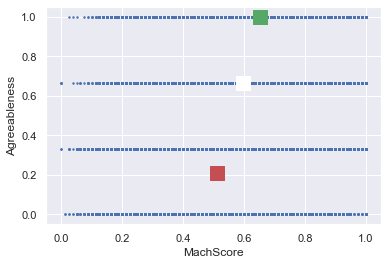

In [146]:
columnlist4=['MachScore', 'Agreeableness']
vdata2 = data[columnlist4]

mm = MinMaxScaler()
scaledata2= mm.fit_transform(vdata2)
scaledata2 = pd.DataFrame(scaledata2,columns = columnlist4)
kn = KMeans(n_clusters =3)
kn.fit(scaledata2)
#ykm2= kn.predict(scaledata2)
print(pd.DataFrame(mm.inverse_transform(kn.cluster_centers_),columns = columnlist4))

plt.scatter(scaledata2.iloc[ : , 0], scaledata2.iloc[ : , 1], s =2, c='b')
plt.scatter(kn.cluster_centers_[0][0],kn.cluster_centers_[0][1], s=200, c='g', marker='s')
plt.scatter(kn.cluster_centers_[1][0],kn.cluster_centers_[1][1], s=200, c='r', marker='s')
plt.scatter(kn.cluster_centers_[2][0],kn.cluster_centers_[2][1], s=200, c='w', marker='s')
plt.xlabel('MachScore')
plt.ylabel('Agreeableness')
plt.show()

- TIPI 값은 1 2 3 4 로 분류되어있기 때문에 다른 TIPI 피쳐와 클러스터링 했을 때 위와 같은 그래프가 생성
- 점들이 뭉쳐있기 때문에 점의 분포를 확인할 수 없기 때문에 클러스터링 중심점을 추출하고 그 사이의 거리를 

   MachScore   TIPImean
0   2.582530   9.527684
1   3.538115  13.333471
2   4.042969   9.868684


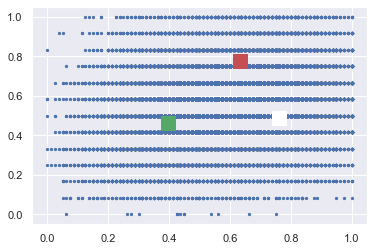

In [145]:
data['TIPImean']= data[['Extraversion', 'Agreeableness',
'Emotional Stability', 'Openness to Experiences']].sum(axis = 1)
columnlist4=['MachScore', 'TIPImean']
vdata2 = data[columnlist4]

mm = MinMaxScaler()
scaledata2= mm.fit_transform(vdata2)
scaledata2 = pd.DataFrame(scaledata2,columns = columnlist4)
kn = KMeans(n_clusters =3)
kn.fit(scaledata2)
#ykm2= kn.predict(scaledata2)
print(pd.DataFrame(mm.inverse_transform(kn.cluster_centers_),columns = columnlist4))

plt.scatter(scaledata2.iloc[ : , 0], scaledata2.iloc[ : , 1], s =5, c='b')
plt.scatter(kn.cluster_centers_[0][0],kn.cluster_centers_[0][1], s=200, c='g', marker='s')
plt.scatter(kn.cluster_centers_[1][0],kn.cluster_centers_[1][1], s=200, c='r', marker='s')
plt.scatter(kn.cluster_centers_[2][0],kn.cluster_centers_[2][1], s=200, c='w', marker='s')
plt.show()

# 마키아벨리즘 스코어와 투표 그리고 TIPI 각 피쳐 클러스터링 

## 'voted','MachScore','Agreeableness'

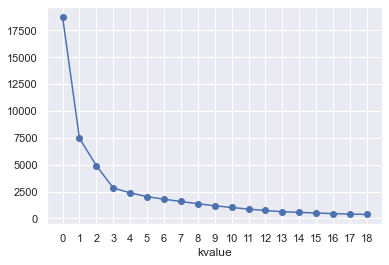

In [119]:
columnlist4=['voted','MachScore','Agreeableness']
vdata2 = data[columnlist4]

mm = MinMaxScaler()
scaledata2= mm.fit_transform(vdata2)
scaledata2 = pd.DataFrame(scaledata2,columns = columnlist4)
dist2 =[]
for i in range(1,20):
    km2 = KMeans(n_clusters=i,init = 'k-means++',n_init=10,max_iter = 300)
    km2.fit(scaledata2)
    dist2.append(km2.inertia_)
plt.plot(range(len(dist)),dist2,marker = 'o')
ticks = plt.xticks(range(len(dist2)))
plt.xlabel('kvalue')
plt.show()

In [120]:
kn = KMeans(n_clusters =3)
kn.fit(scaledata2)
ykm2= kn.predict(scaledata2
pd.DataFrame(mm.inverse_transform(kn.cluster_centers_),columns = columnlist4)

,voted,MachScore,Agreeableness
0,3.608225e-14,3.585457,3.613362
1,1.000000e+00,3.263302,2.857648
2,-1.221245e-14,3.115862,1.618596


In [54]:
columnlist4=['voted','MachScore', 'Extraversion']
vdata2 = data[columnlist4]

mm = MinMaxScaler()
scaledata2= mm.fit_transform(vdata2)
scaledata2 = pd.DataFrame(scaledata2,columns = columnlist4)
kn = KMeans(n_clusters =3)
kn.fit(scaledata2)
ykm2= kn.predict(scaledata2)
#vdata2['k3'] = ykm2
pd.DataFrame(mm.inverse_transform(kn.cluster_centers_),columns = columnlist4)

,voted,MachScore,Extraversion
0,-6.550316e-15,3.401625,1.471836
1,1.000000e+00,3.263302,2.611574
2,3.175238e-14,3.441894,3.437696


In [55]:
columnlist4=['voted','MachScore', 'Conscientiousness']
vdata2 = data[columnlist4]

mm = MinMaxScaler()
scaledata2= mm.fit_transform(vdata2)
scaledata2 = pd.DataFrame(scaledata2,columns = columnlist4)
kn = KMeans(n_clusters =3)
kn.fit(scaledata2)
ykm2= kn.predict(scaledata2)
#vdata2['k3'] = ykm2
pd.DataFrame(mm.inverse_transform(kn.cluster_centers_),columns = columnlist4)

,voted,MachScore,Conscientiousness
0,1.643130e-14,3.477921,3.531010
1,1.000000e+00,3.263302,2.496946
2,1.748601e-14,3.375583,1.571987


In [56]:

columnlist4=['voted','MachScore', 'Emotional Stability']
vdata2 = data[columnlist4]

mm = MinMaxScaler()
scaledata2= mm.fit_transform(vdata2)
scaledata2 = pd.DataFrame(scaledata2,columns = columnlist4)
kn = KMeans(n_clusters =3)
kn.fit(scaledata2)
ykm2= kn.predict(scaledata2)
#vdata2['k3'] = ykm2
pd.DataFrame(mm.inverse_transform(kn.cluster_centers_),columns = columnlist4)

,voted,MachScore,Emotional Stability
0,2.053913e-15,3.454508,1.686777
1,1.000000e+00,3.263302,2.637941
2,2.775558e-14,3.406067,3.535878


In [57]:
columnlist4=['voted','MachScore', 'Openness to Experiences']
vdata2 = data[columnlist4]

mm = MinMaxScaler()
scaledata2= mm.fit_transform(vdata2)
scaledata2 = pd.DataFrame(scaledata2,columns = columnlist4)
kn = KMeans(n_clusters =3)
kn.fit(scaledata2)
ykm2= kn.predict(scaledata2)
#vdata2['k3'] = ykm2
pd.DataFrame(mm.inverse_transform(kn.cluster_centers_),columns = columnlist4)

,voted,MachScore,Openness to Experiences
0,2.409184e-14,3.424596,1.925371
1,1.000000e+00,3.263302,2.556950
2,8.326673e-15,3.428638,3.476730


In [66]:
columnlist4 = ['voted','Extraversion', 'Agreeableness',
'Conscientiousness','Emotional Stability', 'Openness to Experiences']
vdata2 = data[columnlist4]

mm = MinMaxScaler()
scaledata2= mm.fit_transform(vdata2)
scaledata2 = pd.DataFrame(scaledata2,columns = columnlist4)
kn = KMeans(n_clusters =4)
kn.fit(scaledata2)
ykm2= kn.predict(scaledata2)
#vdata2['k3'] = ykm2
pd.DataFrame(mm.inverse_transform(kn.cluster_centers_),columns = columnlist4)

,voted,Extraversion,Agreeableness,Conscientiousness,Emotional Stability,Openness to Experiences
0,1.532108e-14,2.837419,3.103140,3.428302,3.221530,2.705747
1,1.000000e+00,1.445440,2.820928,2.489203,2.579830,2.419366
2,1.854072e-14,2.532992,2.778976,1.696850,2.314961,2.545984
3,1.000000e+00,3.462854,2.884454,2.502599,2.680362,2.657387


In [ ]:
# 투표와 TIPI 관계 투표한 경우 건질것 없음

In [61]:
columnlist4 = ['MachScore','Extraversion', 'Agreeableness',
'Conscientiousness','Emotional Stability', 'Openness to Experiences']
vdata2 = data[columnlist4]

mm = MinMaxScaler()
scaledata2= mm.fit_transform(vdata2)
scaledata2 = pd.DataFrame(scaledata2,columns = columnlist4)
kn = KMeans(n_clusters =3)
kn.fit(scaledata2)
ykm2= kn.predict(scaledata2)
#vdata2['k3'] = ykm2
pd.DataFrame(mm.inverse_transform(kn.cluster_centers_),columns = columnlist4)

,MachScore,Extraversion,Agreeableness,Conscientiousness,Emotional Stability,Openness to Experiences
0,3.397387,3.223883,3.044087,3.383123,3.486375,2.768882
1,3.298298,1.351469,2.759012,2.416756,2.530774,2.341589
2,3.361897,3.346193,2.903046,1.817640,2.135025,2.669099


In [ ]:
# 마키아벨리스코어와 TIPI 관계 마키아벨리 스코어가 높아지면 Agreeableness , Openness to Experiences 올라간다.

In [64]:
columnlist4 = ['MachScore','Extraversion', 'Agreeableness',
'Conscientiousness','Emotional Stability', 'Openness to Experiences']
vdata2 = data[columnlist4][data['voted'] == 1]

mm = MinMaxScaler()
scaledata2= mm.fit_transform(vdata2)
scaledata2 = pd.DataFrame(scaledata2,columns = columnlist4)
kn = KMeans(n_clusters =3)
kn.fit(scaledata2)
ykm2= kn.predict(scaledata2)
#vdata2['k3'] = ykm2
pd.DataFrame(mm.inverse_transform(kn.cluster_centers_),columns = columnlist4)

,MachScore,Extraversion,Agreeableness,Conscientiousness,Emotional Stability,Openness to Experiences
0,3.208542,3.321874,2.603513,1.978832,1.879748,2.541210
1,3.246286,1.332778,2.774400,2.454116,2.515896,2.334583
2,3.335306,3.273493,3.196365,3.052453,3.514037,2.809102


In [ ]:
# 클러스터링 (투표를 한 경우) 마키아벨리 스코어 3.4 이하 Conscientiousness 3이하 

In [65]:
columnlist4 = ['MachScore','Extraversion', 'Agreeableness',
'Conscientiousness','Emotional Stability', 'Openness to Experiences']
vdata2 = data[columnlist4][data['voted'] == 0]

mm = MinMaxScaler()
scaledata2= mm.fit_transform(vdata2)
scaledata2 = pd.DataFrame(scaledata2,columns = columnlist4)
kn = KMeans(n_clusters =3)
kn.fit(scaledata2)
ykm2= kn.predict(scaledata2)
#vdata2['k3'] = ykm2
pd.DataFrame(mm.inverse_transform(kn.cluster_centers_),columns = columnlist4)

,MachScore,Extraversion,Agreeableness,Conscientiousness,Emotional Stability,Openness to Experiences
0,3.073088,2.557133,1.577093,2.295111,2.499397,2.529672
1,3.571425,2.882545,3.423382,3.506688,3.311474,2.732572
2,3.584758,2.571689,3.628870,1.698191,2.377807,2.589049


In [ ]:
# 클러스터링 투표 (안한경우) 특징 마키아벨리스코어 3.5 이상? Agreeableness 3.4이상 

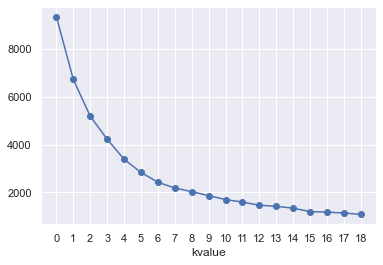

In [79]:
columnlist4 = ['education', 'engnat', 'gender', 'hand','married','voted']
vdata2 = data[columnlist4][(data['MachScore'] >= 3.5) & (data['Agreeableness'] >= 3.4) ]

mm = MinMaxScaler()
scaledata2= mm.fit_transform(vdata2)
scaledata2 = pd.DataFrame(scaledata2,columns = columnlist4)
dist2 =[]
for i in range(1,20):
    km2 = KMeans(n_clusters=i,init = 'k-means++',n_init=10,max_iter = 300)
    km2.fit(scaledata2)
    dist2.append(km2.inertia_)
plt.plot(range(len(dist)),dist2,marker = 'o')
ticks = plt.xticks(range(len(dist2)))
plt.xlabel('kvalue')
plt.show()

In [81]:
columnlist4 = ['education', 'engnat', 'gender', 'hand','married','voted']
vdata2 = data[columnlist4][(data['MachScore'] >= 3.5) & (data['Agreeableness'] >= 3.4) ]

mm = MinMaxScaler()
scaledata2= mm.fit_transform(vdata2)
scaledata2 = pd.DataFrame(scaledata2,columns = columnlist4)
kn = KMeans(n_clusters =5)
kn.fit(scaledata2)
ykm2= kn.predict(scaledata2)
#vdata2['k3'] = ykm2
pd.DataFrame(mm.inverse_transform(kn.cluster_centers_),columns = columnlist4)

,education,engnat,gender,hand,married,voted
0,2.892833,1.238225,-2.442491e-15,1.185666,1.459386,1.000000e+00
1,2.798732,1.280903,1.000000e+00,1.210777,1.362124,1.000000e+00
2,2.417729,2.000000,5.863268e-01,1.195249,1.117034,3.608225e-15
3,2.078547,1.000000,1.000000e+00,1.234256,1.174048,4.662937e-15
4,2.051791,1.000000,-2.664535e-15,1.204959,1.203306,3.774758e-15


In [ ]:
# 투표를 한 클러스터 0 1 은 2 3 4 보다 교육 수준이 높다는 것을 확인할 수 있다. 
# 마키아벨리즘 스코어가 3.5 이상이고 Agreeableness 수치가 3.4 이상이고 교육 수준이 높으면 투표를 한다는 것을 확인 
# 교육 수준이 투표를 하는데 지배적인가?

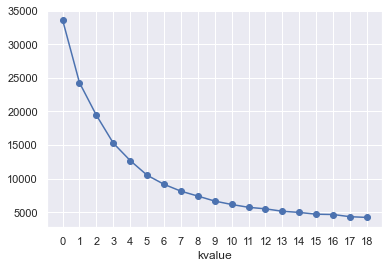

In [85]:
columnlist4 = ['education', 'engnat', 'gender', 'hand','married','voted' ]
vdata2 = data[columnlist4][(data['MachScore'] <= 3.5) | (data['Agreeableness'] <= 3.4) ]

mm = MinMaxScaler()
scaledata2= mm.fit_transform(vdata2)
scaledata2 = pd.DataFrame(scaledata2,columns = columnlist4)
dist2 =[]
for i in range(1,20):
    km2 = KMeans(n_clusters=i,init = 'k-means++',n_init=10,max_iter = 300)
    km2.fit(scaledata2)
    dist2.append(km2.inertia_)
plt.plot(range(len(dist)),dist2,marker = 'o')
ticks = plt.xticks(range(len(dist2)))
plt.xlabel('kvalue')
plt.show()

In [86]:
columnlist4 = ['education', 'engnat', 'gender', 'hand','married','voted']
vdata2 = data[columnlist4][(data['MachScore'] <= 3.5) | (data['Agreeableness'] <= 3.4) ]

mm = MinMaxScaler()
scaledata2= mm.fit_transform(vdata2)
scaledata2 = pd.DataFrame(scaledata2,columns = columnlist4)
kn = KMeans(n_clusters =3)
kn.fit(scaledata2)
ykm2= kn.predict(scaledata2)
#vdata2['k3'] = ykm2
pd.DataFrame(mm.inverse_transform(kn.cluster_centers_),columns = columnlist4)

,education,engnat,gender,hand,married,voted
0,2.829792,2.0,0.580405,1.138333,1.298324,4.415611e-01
1,2.888151,1.0,0.458997,1.172174,1.640851,1.000000e+00
2,2.217782,1.0,0.496299,1.175933,1.324822,-1.576517e-14


In [ ]:
# 교육 수준이 높다고 꼭 투표를 하는 것은 아니라는 것을 확인할 수 있음